# Лабораторная работа №7 - Моделирование случайных блужданий

В результате проведения определенного количества экспериментов требуется построить статистическое распределение исследуемого параметра (гистограмму и эмперическую функцию распределения) и определить целесообразность аппроксимации полученного распределения одним из известных законов (нормальным, экспоненциальным, логарифмически-нормальным и др.).

#### Пчелы на квадратной решетке. «Рой» из $N$ «пчёл» изначально расположен в единичном круге с центром в начале координат. На каждом шаге по времени каждая пчела движется случайным образом равновероятно в одном из четырех направлений: на север, юг, восток и запад. Определите расстояние, на которое удаляется отдельная пчела за $M = 8$ шагов. В течение каждого временного интервала каждая пчела делает шаг единичной длины. Усреднение выполняется по N пчёлам.

In [16]:
import random
import math

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt; plt.rcParams['figure.figsize'] = [12, 6]
import matplotlib; matplotlib.style.use('ggplot')

In [17]:
n = 1000  # Объем выборки
M = 8     # Количество шагов

In [18]:
class RandomWalk:
    def __init__(self, n, M):
        self.n = n
        self.M = M

    def model(self):
        bees = [0 for _ in range(self.n)]
        L = 0

        for i in range(self.n):
            x, y = 0, 0

            for j in range(self.M):
                r = random.random()

                if r < 0.25:
                    x += 1
                elif r < 0.5:
                    x -= 1
                elif r < 0.75:
                    y -= 1
                else:
                    y += 1
            
            bees[i] = math.sqrt(x ** 2 + y ** 2)
            L += math.sqrt(x ** 2 + y ** 2)

        return bees, L / self.n

In [19]:
task = RandomWalk(n, M)

### Реализация двумерного случайного блуждания

In [20]:
distribution_list, L = task.model()

sample = pd.Series(distribution_list, name='value')
distribution = pd.DataFrame(sample)
distribution['cdf'] = distribution.rank(method='average', pct=True)

### Среднее значение

In [21]:
print(round(L, 3))

2.541


### Статистическая фукнция распределения

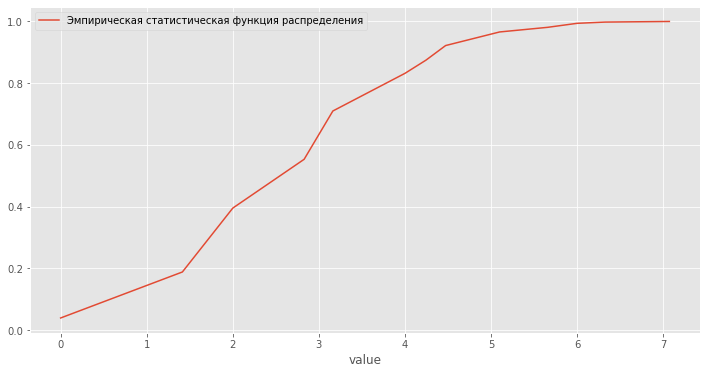

In [22]:
distribution.sort_values("value").plot(x="value", y="cdf", label="Эмпирическая статистическая функция распределения")
plt.legend(loc="upper left")

### Гистограмма частот

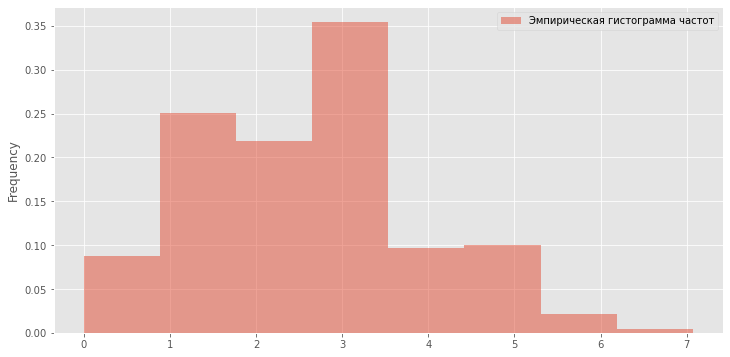

In [23]:
sample.plot.hist(bins=8, alpha=0.5, density=True, label="Эмпирическая гистограмма частот")
plt.legend(loc="upper right")